# Data Cleaning

In [1]:
#!pip install unidecode

In [2]:
#!pip install nltk

In [3]:
#!pip install datetime

In [4]:
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from datetime import datetime
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import unidecode
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import os

## instalacion NLTK

In [5]:
#!pip install nltk

## instalacion datetime

In [6]:
#!pip install datetime

In [7]:
pd.set_option('max_colwidth', 800) 
data = pd.read_csv("../QueEstaPasando/data/total.csv", index_col=0)
data.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,@MercantilBanco Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28T22:47:36.000Z,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,@MercantilBanco Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28T22:46:07.000Z,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,@MercantilBanco Deseo es reponer mi tarjeta de débito,2021-04-28T22:32:15.000Z,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"@jesusmdbtw2012 @MercantilBanco Si lo está, estoy en la misma situación",2021-04-28T22:06:42.000Z,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El @MercantilBanco me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28T21:48:28.000Z,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


In [8]:
data.shape

(4800, 9)

In [9]:
df_cleaning = data

In [10]:
df_cleaning.dtypes

Unnamed: 0.1      int64
text             object
created_at       object
author_id         int64
id                int64
neg             float64
neu             float64
pos             float64
score            object
dtype: object

## Remover duplicados  mover 1

In [11]:
df_cleaning.drop_duplicates(inplace=True)

In [12]:
df_cleaning.shape

(4798, 9)

## Revisar y Eliminar Null

In [13]:
df_cleaning.isna().sum()

Unnamed: 0.1    0
text            0
created_at      0
author_id       0
id              0
neg             0
neu             0
pos             0
score           0
dtype: int64

In [14]:
df_cleaning.dropna(axis=0, inplace=True)

In [15]:
df_cleaning.isna().sum()

Unnamed: 0.1    0
text            0
created_at      0
author_id       0
id              0
neg             0
neu             0
pos             0
score           0
dtype: int64

## Eliminar menciones

In [16]:
def remove_mencion(text):
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    return text

In [17]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_mencion)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28T22:47:36.000Z,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28T22:46:07.000Z,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28T22:32:15.000Z,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28T22:06:42.000Z,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28T21:48:28.000Z,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Formateo de campo fecha

In [18]:
df_cleaning['created_at'] = pd.to_datetime(df_cleaning['created_at']) #lo hacemos un objeto tiempo
df_cleaning['created_at'] = df_cleaning['created_at'].dt.strftime("%Y-%m-%d") #tomo los elementos que quiero de ese objeto
df_cleaning['created_at'] = pd.to_datetime(df_cleaning['created_at']) #vuelvo a hacerlo un objeto datetime

df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Remplaza palabra 't pago' por 'tpago'

In [19]:
df_cleaning['text'] = df_cleaning['text'].str.replace('t pago', 'tpago')
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Elimina los caracteres iniciales (espacios al principio) y finales (espacios al final)

In [20]:
df_cleaning['text'] = df_cleaning['text'].str.strip()
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta...está fallando la plataforma?,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes! En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes!,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"Si lo está, estoy en la misma situación",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"El me quito 180.000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil, la cual nunca llego, son ladrones o no? https://t.co/bVVmvxfhjH",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Se Eliminan los Caracteres Especiales

👇 Remove punctuation and lower case the text.

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
mi_puntuacion = '!¡"#$%&\'()*+,-./:;<=>¿?@[\\]^_`{|}~'

In [23]:
def remove_puntuation(text):
    for punctuation in mi_puntuacion:
        text = text.replace(punctuation, " ")
    return text

In [24]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_puntuation)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,Buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta está fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,Buenas tardes En esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,Deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,Si lo está estoy en la misma situación,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,El me quito 180 000 Bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil la cual nunca llego son ladrones o no https t co bVVmvxfhjH,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Covierte en minusculas todo

In [25]:
def remove_lower(text1):
    text1 = text1.lower()
    return text1

In [26]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_lower)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mi mercantil en línea y dice datos y clave incorrecta está fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes en esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente más tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo es reponer mi tarjeta de débito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si lo está estoy en la misma situación,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,el me quito 180 000 bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago móvil la cual nunca llego son ladrones o no https t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Elimina Acentos

In [27]:
from unicodedata import normalize
def cambia_acentuadas(text):
    trans_tab = dict.fromkeys(map(ord, u'\u0301\u0308'), None)
    text = normalize('NFKC', normalize('NFKD', text).translate(trans_tab))
    return text

In [28]:
df_cleaning['text'] = df_cleaning['text'].apply(cambia_acentuadas)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mi mercantil en linea y dice datos y clave incorrecta esta fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes en esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente mas tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo es reponer mi tarjeta de debito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si lo esta estoy en la misma situacion,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,el me quito 180 000 bs por 4 mensajes de texto al 24024 solicitando clave temporal para un pago movil la cual nunca llego son ladrones o no https t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Remueve Numeros

In [29]:
def remove_numbers(text1):
    text1 = ''.join(word for word in text1 if not word.isdigit())
    return text1

In [30]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_numbers)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mi mercantil en linea y dice datos y clave incorrecta esta fallando la plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes en esta oportunidad les escribo para saber si hay problemas con la plataforma para realizar transferencias a otras cuentas mercantil ya que al momento de realizar una transferencia me arroja el mensaje de que intente mas tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo es reponer mi tarjeta de debito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si lo esta estoy en la misma situacion,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,el me quito bs por mensajes de texto al solicitando clave temporal para un pago movil la cual nunca llego son ladrones o no https t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Separar palabras

In [31]:
def remove_StopWords(text):
    spanish_stopwords = set(stopwords.words('spanish'))
    #stop_words = set(stopwords.words('spanish'))
    word_tokens = word_tokenize(text) 
    text = [w for w in word_tokens if not w in spanish_stopwords]
    return text

In [32]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_StopWords)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,"[buenas, tardes, intento, abrir, mercantil, linea, dice, datos, clave, incorrecta, fallando, plataforma]",2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,"[buenas, tardes, oportunidad, escribo, saber, si, problemas, plataforma, realizar, transferencias, cuentas, mercantil, momento, realizar, transferencia, arroja, mensaje, intente, mas, tardes]",2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,"[deseo, reponer, tarjeta, debito]",2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,"[si, misma, situacion]",2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,"[quito, bs, mensajes, texto, solicitando, clave, temporal, pago, movil, nunca, llego, ladrones, https, t, co, bvvmvxfhjh]",2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


## Lemmatizer

In [33]:
from nltk.stem import WordNetLemmatizer
def remove_Lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    str_lemmatizer = " ".join(lemmatized)
    return str_lemmatizer

In [34]:
df_cleaning['text'] = df_cleaning['text'].apply(remove_Lemmatize)
df_cleaning.head()

,Unnamed: 0.1,text,created_at,author_id,id,neg,neu,pos,score
0,0,buenas tardes intento abrir mercantil linea dice datos clave incorrecta fallando plataforma,2021-04-28,202148873,1387539021983850497,0.994753,0.004321,0.000926,neg
1,1,buenas tardes oportunidad escribo saber si problemas plataforma realizar transferencias cuentas mercantil momento realizar transferencia arroja mensaje intente ma tardes,2021-04-28,1274553941917863936,1387538646832648197,0.666402,0.328037,0.005561,neg
2,2,deseo reponer tarjeta debito,2021-04-28,343710274,1387535156626526209,0.107078,0.886624,0.006298,neu
3,3,si misma situacion,2021-04-28,1323258072534552577,1387528726712311812,0.003918,0.989461,0.006621,neu
4,4,quito b mensajes texto solicitando clave temporal pago movil nunca llego ladrones http t co bvvmvxfhjh,2021-04-28,1099360339207049218,1387524137904754689,0.996315,0.002650,0.001035,neg


In [35]:
df_cleaning.shape

(4798, 9)

## Definir Train y test

In [36]:
X = df_cleaning['text']
y = df_cleaning['score']

In [37]:

# fig, ax = plt.subplots()
# #Colocamos una etiqueta en el eje Y
# ax.set_ylabel('Twitts')
# #Colocamos una etiqueta en el eje X
# ax.set_title('Cantidad de Twitts')
# #Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
# plt.bar(X, y)
# plt.savefig('Fecha.png')
# #Finalmente mostramos la grafica con el metodo show()
# plt.show()


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
X_train

672                                                                                                                    amigo avispense si domingo goncalves rey bingo demanda ganada logrado reintegren retenidos
200                                                                                                estafa haber pedido sitme viajero haberlo usado viaje años despues reclamando ahorros real debias usar guardar
265                                                                                                                                                                                    ayuda http t co bmkgpxjmey
179    ponemos disposicion calendario diferentes versiones planifiques año descargalo version preferencia web movil aqui http t co bitpjpz ingresando http t co wwvtdpsh calendariobbvaprovincial http t co tqxjd
708                                                                                                                                          mete pagina cta bus

### Pipeline modelo

In [40]:
# Create Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import LogisticRegression
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Create Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase = False)),
    ('model', MultinomialNB()),
])

# Set parameters to search
#parameters = {
 #   'tfidf__ngram_range': [(1,1), (2,2), (1,2)],
  #  'tfidf__min_df': stats.loguniform(0.01, .5),
   # 'tfidf__max_df': stats.loguniform(0.01, .5),
    #'model__alpha': stats.loguniform(0.01, 10),
#}

parameters = {
    'tfidf__ngram_range': [(1,1), (2,2), (1,2),],
    'tfidf__min_df': stats.loguniform(0.01, 0.2),
    'tfidf__max_df': stats.loguniform(0.01, 0.3),
    'tfidf__norm' : ['l1', 'l2'] ,
    'model__alpha': stats.uniform(0.5, 1)
}

# Perform grid search on pipeline
grid_search = RandomizedSearchCV(pipeline, parameters, n_jobs=-1, 
                           verbose=1, scoring = "accuracy", cv=5, n_iter=200, refit=True)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tfidf',
                                              TfidfVectorizer(lowercase=False)),
                                             ('model', MultinomialNB())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'model__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0ab83a3a0>,
                                        'tfidf__max_df': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0ab83a160>,
                                        'tfidf__min_df': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0a71f1d90>,
                                        'tfidf__ngram_range': [(1, 1), (2, 2),
                                                               (1, 2)],
                                        'tfidf__norm': ['l1', 'l2']},
                   scoring='accuracy', verbose=1)

##RandomizedSearchCV

In [41]:
grid_search.best_score_

0.647407476403378

In [42]:
grid_search.best_params_

{'model__alpha': 0.7164895058749626,
 'tfidf__max_df': 0.17231890347204798,
 'tfidf__min_df': 0.011657721865512114,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2'}

In [43]:
grid_search.best_estimator_

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(lowercase=False, max_df=0.17231890347204798,
                                 min_df=0.011657721865512114)),
                ('model', MultinomialNB(alpha=0.7164895058749626))])

In [44]:
grid_search.best_estimator_.score(X_test, y_test)

0.6770833333333334

In [45]:
result = grid_search.best_estimator_.predict(X_test)

In [46]:
result

array(['neg', 'neu', 'neu', ..., 'neg', 'neg', 'neg'], dtype='<U3')

In [47]:
result[2]

'neu'

In [48]:
X_test.head(2)

246    oh habiamos hablado dificultades acceso movilizacion obviamente financieras trasladarme etc habiamos acordado comunicarnos via mail haciendo aun hoy recibido respuesta alguna
146                                                                                                        bodmiente boddevuelvanlosahorros bodnosrobanlosahorros http t co jkgvnsori
Name: text, dtype: object

In [49]:
X_test.head()

246                                          oh habiamos hablado dificultades acceso movilizacion obviamente financieras trasladarme etc habiamos acordado comunicarnos via mail haciendo aun hoy recibido respuesta alguna
146                                                                                                                                              bodmiente boddevuelvanlosahorros bodnosrobanlosahorros http t co jkgvnsori
687                                                                                                                           mal verdad esperar entonces ma preocupante saime pronunciado respecto muchisimos casos suerte
447    usaran mercenarios amenazar tipo denuncias tambien fechorias estafa institucion criminal tarde temprano pagaran vuelta atras devuelvan ahorros criminales sistema bancario jamas tendran imagen http t co ejbpzankce
157                                                                                                                     

In [50]:
#for i in X_test.keys():
    #result[i] = X_test[i]

### Learning Curves

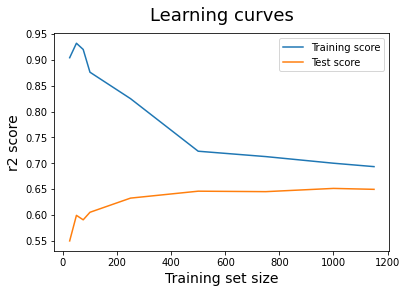

In [51]:
#from sklearn.linear_model import LinearRegression
# se crea la lista de verificacion
train_sizes = [25,50,75,100,250,500,750,1000,1150]
# se crea la linea de regresion
train_sizes, train_scores, test_scores = learning_curve(
    estimator=grid_search.best_estimator_, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)
# Se calcula la media de los score de cada una de los cv ejecutados
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
	
# Se grafica los score
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()